In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
#import matplotlib as mpl
from scipy import optimize as scop
import pyCardiac as pc
#plt.style.use('seaborn')
import itertools
plt.style.use('/home/nik/Documents/nico_general.mplstyle')

In [2]:
Ncolors_Na = 22
Ncolors_Na_inact = 15
Ncolors_Ca = 11
Ncolors_Ca_inact = 18
colormap = plt.cm.tab20b# ListedColormap
#colormap = plt.cm.# LinearSegmentedColormap
#Ncolors = min(colormap.N,Ncolors)
mapcolors_na = [colormap(int(x*colormap.N/Ncolors_Na)) for x in range(Ncolors_Na)]
mapcolors_inact_na = [colormap(int(x*colormap.N/Ncolors_Na_inact)) for x in range(Ncolors_Na_inact)]
mapcolors_ca = [colormap(int(x*colormap.N/Ncolors_Ca)) for x in range(Ncolors_Ca)]
mapcolors_inact_ca = [colormap(int(x*colormap.N/Ncolors_Ca_inact)) for x in range(Ncolors_Ca_inact)]

In [3]:
def normalize(data_in):
    data = np.array(data_in)
    #print(max(data), min(data))
    return data/(max(data)-min(data))

In [4]:
def activationcurve_INa(data = [], start=7350, end=9300, Ina_start = 5390, Ina_end = 6050, cm=1, mark = 'no_base', lab= 'two_cur', const = False):
    
    #cm=1
    baseline = []
    min_list = []
    leak_current = []
    end_of_base= int(0.150*len(data[0]))
    plt.figure(figsize=(10,8))
    ax = plt.subplot(111)
    box = ax.get_position()
    
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
    dif_label = 50
    coef_label = 10
    color = mapcolors_ca
    
    current = []
    conduct_time = int(5/1000/data[0][1])
    print(conduct_time)
    current.append(np.array(data[0][1900:4078]))
    
    
    if len(data.columns)>13:
        dif_label = 85
        coef_label = 5
        color = mapcolors_na

    for k in data.columns[1:]:    
        
        baseline.append(sum(data[k][start:end])/len(data[k][start:end]))
        b = baseline[k-1]
        if mark != 'raw':
            b = 0
        
                 
        
        peak_x = np.argmin(data[k][Ina_start:Ina_end])+Ina_start
        peak_y = min(data[k][Ina_start:Ina_end])-b 
        current.append(np.array(data[k][1900:4078])-b)
        plt.axvline(data[0][4078], color = 'k')
        
        min_list.append(peak_y/cm)
        leak_current.append(sum(data[k][:end_of_base])/len(data[k][:end_of_base]))
       
        label_name = str(k*coef_label-dif_label)+ ', mV'
        ax.plot(data[0][::1], data[k][::1] ,linewidth = 3, label = label_name, color = color[k-1])
        plt.scatter(data[0][peak_x],peak_y+b, color = color[k-1])

    ax.axvline(x = data[0][start],color = 'k', linestyle = 'dashed')
    ax.axvline(x = data[0][end],color = 'k', linestyle = 'dashed')
    ax.axvline(x=data[0][Ina_start],color = 'r', linestyle = 'dashed')
    ax.axvline(x=data[0][Ina_end], color = 'r', linestyle = 'dashed')
    
    
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5, fontsize = 12)
    plt.xlabel('time,s', fontsize=12)
    plt.ylabel('I,pA/pF', fontsize=12)
    if const:
        return min_list, current
    return min_list



100


Text(0.5, 0, 't,s')

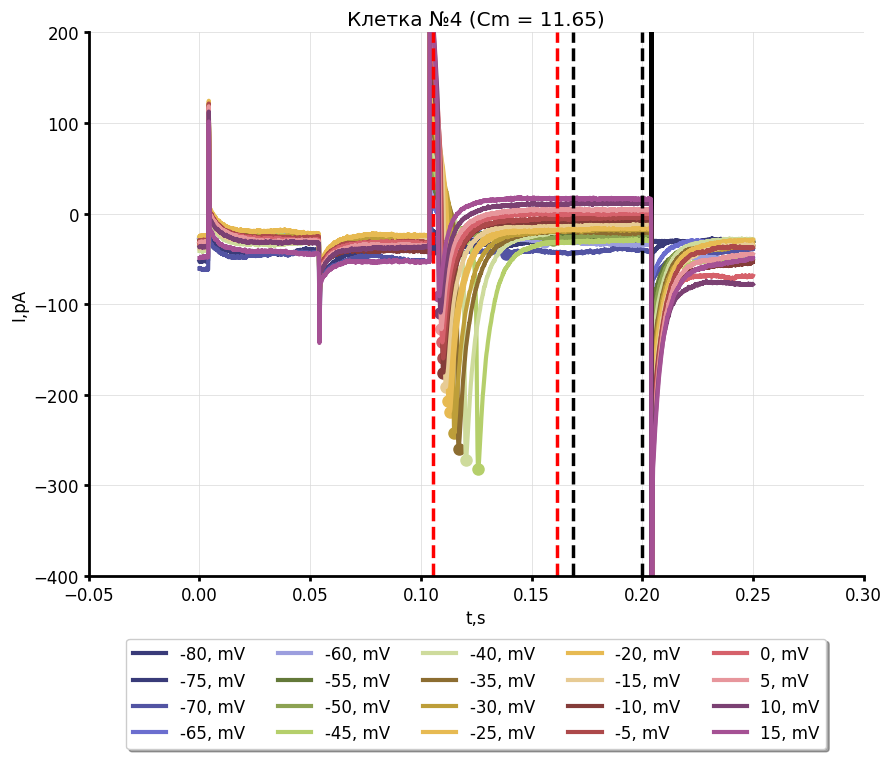

In [5]:
data = pd.read_csv('/home/nik/Documents/comparison/19122020/2020_12_19_0035 I-V INa 11,65 pF.atf' ,delimiter= '\t', header=None, skiprows = 11)
activation_Ina_2020_1219_0035, current_2020_1219_0035= activationcurve_INa(data ,start=3375, end=4000,Ina_start=2110, Ina_end=3225, cm=11.65, mark = 'raw', const=True)
#plt.xlim(0.0, 0.215)
plt.ylim(-400,200)
plt.title('Клетка №4 (Сm = 11.65)')
plt.ylabel('I,pA')
plt.xlabel('t,s')

In [6]:
def sodium_current(t,a0_m,b0_m,delta_m,s_m,a0_h,b0_h,delta_h,s_h, R,C , g_max):

    #t = np.arange(0, len(data)*5e-5,5e-5)
    v_const = -80 #mV
    V_m = -10
    v = (v_const - V_m)*np.exp(-(t)/(R*C)) + V_m
       # s<0 , 0 =< delta =<1 , a0, b0 >0
    plt.figure()    
    plt.plot(t, v)
    
    alfa_m = a0_m * np.exp(-delta_m * v / (-s_m))
    betta_m = b0_m * np.exp((1-delta_m) * v / (-s_m))
    
    
    alfa_h = a0_h * np.exp(-delta_h * v / s_h)
    betta_h = b0_h * np.exp((1-delta_h) * v / s_h)

    plt.figure()
    plt.plot(v, alfa_m, label = 'alfa_m')
    plt.plot(v, alfa_h, label = 'alfa_h')
    plt.legend()
    
    plt.figure()
    plt.plot(v, betta_m, label = 'betta_m')
    plt.plot(v, betta_h, label = 'betta_h')
    plt.legend()
    
    
    #alfa_m_0 = a0_m * np.exp(-delta_m * v_const / s_m)
    #betta_m_0 = b0_m * np.exp((1-delta_m) * v_const / s_m)
    #alfa_h_0 = a0_h * np.exp(-delta_h * v_const / s_h)
    #betta_h_0 = b0_h * np.exp((1-delta_h) * v_const / s_h)
    
    
    tau_m = 1/(betta_m + alfa_m)
    tau_h = 1/(betta_h + alfa_h)
    
    
    plt.figure()
    plt.plot(v, tau_m, label = 'tau_m')
    plt.plot(v, tau_h, label = 'tau_h')
    plt.legend()
    
    
    
    m_inf = 1/(1+betta_m/alfa_m)
    h_inf = 1/(1+betta_h/alfa_h)
    
    m0 = 1/(1+(b0_m/a0_m)*np.exp(v_const/(-s_m)))
    h0 = 1/(1+(b0_h/a0_h)*np.exp(v_const/s_h))#1/(1+betta_h_0/alfa_h_0)

    m = m_inf + (m0-m_inf)*np.exp(-t/tau_m)
    h = h_inf + (h0-h_inf)*np.exp(-t/tau_h)
    
    plt.figure()
    plt.scatter(v_const,m0**3, label = 'm_0')
    plt.scatter(v_const,h0, label = 'h_0')
    
    plt.plot(v,m_inf**3, label = 'm_inf')
    plt.plot(v,h_inf, label = 'h_inf')
    plt.legend()
    
    v_rev = 18
    
    i=[]
    for l in range(1,len(v)):
        i.append(1e9*C*(v[l]-v[l-1])/(t[l]-t[l-1]))
    #i.insert(0,i[0])
    i.append(i[-1])
    return g_max*h*(m**3)*(v-v_rev)+i
    #return sum((g_max*h*(m**3)*(v-v_rev)+i - data)**2)


In [7]:
if False:
    def sodium_current_for_fit(t,p0):
        a0_m = p0[0]
        b0_m = p0[1]
        delta_m = p0[2]
        s_m= p0[3]
        a0_h = p0[4]
        b0_h = p0[5]
        delta_h = p0[6]
        s_h = p0[7]
        R = p0[8]
        C = p0[9]


def sodium_current_for_fit(t,a0_m,b0_m,delta_m,s_m,a0_h,b0_h,delta_h,s_h, R,C , g_max):
    
    
    params = [a0_m,b0_m,delta_m,s_m,a0_h,b0_h,delta_h,s_h, R,C , g_max]

    v_const = -80 #mV
    V_m = -10
    v = (v_const - V_m)*np.exp(-(t)/(R*C)) + V_m

    alfa_m = a0_m * np.exp(-delta_m * v / (-s_m))
    betta_m = b0_m * np.exp((1-delta_m) * v / (-s_m))
    
    
    alfa_h = a0_h * np.exp(-delta_h * v / s_h)
    betta_h = b0_h * np.exp((1-delta_h) * v / s_h)

    tau_m = 1/(betta_m + alfa_m)
    tau_h = 1/(betta_h + alfa_h)
    

    
    
    
    m_inf = 1/(1+betta_m/alfa_m)
    h_inf = 1/(1+betta_h/alfa_h)
    
    m0 = 1/(1+(b0_m/a0_m)*np.exp(v_const/(-s_m)))
    h0 = 1/(1+(b0_h/a0_h)*np.exp(v_const/s_h))#1/(1+betta_h_0/alfa_h_0)

    m = m_inf + (m0-m_inf)*np.exp(-t/tau_m)
    h = h_inf + (h0-h_inf)*np.exp(-t/tau_h)

    v_rev = 18
    
    i=[]
    for l in range(1,len(v)):
        i.append(1e9*C*(v[l]-v[l-1])/(t[l]-t[l-1]))
    #i.insert(0,i[0])
    i.append(i[-1])
    plt.scatter(['a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','C  ','g_max'],np.log(params),s = 100, color = 'orange')
    #plt.xlim(0,10)
    return g_max*h*(m**3)*(v-v_rev)+i
    #return sum((g_max*h*(m**3)*(v-v_rev)+i - data)**2)


In [8]:

def log_sodium_current(t,a0_m,b0_m,delta_m,s_m,a0_h,b0_h,delta_h,s_h, R,C ,C_f, g_max):#, V_m):
    
    
    params = [a0_m,b0_m,delta_m,s_m,a0_h,b0_h,delta_h,s_h, R,C ,C_f, g_max]#, V_m]
    C_f = np.exp(C_f)
    
    #V_m = np.exp(V_m)
    a0_m = np.exp(a0_m)
    b0_m = np.exp(b0_m)
    delta_m = np.exp(delta_m)
    s_m = np.exp(s_m)
    
    a0_h = np.exp(a0_h)
    b0_h = np.exp(b0_h)
    delta_h = np.exp(delta_h)
    s_h = np.exp(s_h) 
    R = np.exp(R)
    C = np.exp(C)
    gmax = np.exp(g_max)
    
    #t = np.arange(0, len(data)*5e-5,5e-5)
    v_const = -80 #mV
    V_m = 30
    v = (v_const + V_m)*np.exp(-(t)/(R*C)) - V_m
    # s<0 , 0 =< delta =<1 , a0, b0 >0
    plt.figure()    
    plt.plot(t, v)
    
    alfa_m = a0_m * np.exp(-delta_m * v / (-s_m))
    betta_m = b0_m * np.exp((1-delta_m) * v / (-s_m))
    
    
    alfa_h = a0_h * np.exp(-delta_h * v / s_h)
    betta_h = b0_h * np.exp((1-delta_h) * v / s_h)

    plt.figure()
    plt.plot(v, alfa_m, label = 'alfa_m')
    plt.plot(v, alfa_h, label = 'alfa_h')
    plt.legend()
    
    plt.figure()
    plt.plot(v, betta_m, label = 'betta_m')
    plt.plot(v, betta_h, label = 'betta_h')
    plt.legend()
    
    
    alfa_m_0 = a0_m * np.exp(-delta_m * v_const / s_m)
    betta_m_0 = b0_m * np.exp((1-delta_m) * v_const / s_m)
    alfa_h_0 = a0_h * np.exp(-delta_h * v_const / s_h)
    betta_h_0 = b0_h * np.exp((1-delta_h) * v_const / s_h)
    
    
    tau_m = 1/(betta_m + alfa_m)
    tau_h = 1/(betta_h + alfa_h)
    
    
    plt.figure()
    plt.plot(v, tau_m, label = 'tau_m')
    plt.plot(v, tau_h, label = 'tau_h')
    plt.legend()
    
    
    
    m_inf = 1/(1+betta_m/alfa_m)
    h_inf = 1/(1+betta_h/alfa_h)
    
    m0 = 1/(1+(b0_m/a0_m)*np.exp(v_const/(-s_m)))
    h0 = 1/(1+(b0_h/a0_h)*np.exp(v_const/s_h))#1/(1+betta_h_0/alfa_h_0)

    m = m_inf + (m0-m_inf)*np.exp(-t/tau_m)
    h = h_inf + (h0-h_inf)*np.exp(-t/tau_h)
    
    plt.figure()
    plt.scatter(v_const,m0**3, label = 'm_0')
    plt.scatter(v_const,h0, label = 'h_0')
    
    plt.plot(v,m_inf, label = 'm_inf')
    plt.plot(v,h_inf, label = 'h_inf')
    plt.legend()
    
    v_rev = 18
    
    i=[]
    for l in range(1,len(v)):
        i.append(1e9*(C+C_f)*(v[l]-v[l-1])/(t[l]-t[l-1]))
    #i.insert(0,i[0])
    i.append(i[-1])
    #plt.scatter(['a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','C  ','g_max'],params,s = 100, color = 'orange')
    #plt.xlim(0,10)
    return g_max*h*(m**3)*(v-v_rev)+i
    #return sum((g_max*h*(m**3)*(v-v_rev)+i - data)**2)


In [9]:

def log_sodium_current_for_fit(t,a0_m,b0_m,delta_m,s_m,a0_h,b0_h,delta_h,s_h, R,C,C_f , g_max):#, V_m):
    
    
    params = [a0_m,b0_m,delta_m,s_m,a0_h,b0_h,delta_h,s_h, R,C ,C_f, g_max]#, V_m]
    C_f = np.exp(C_f)
    #V_m = np.exp(V_m)
    a0_m = np.exp(a0_m)
    b0_m = np.exp(b0_m)
    delta_m = np.exp(delta_m)
    s_m = np.exp(s_m)
    
    a0_h = np.exp(a0_h)
    b0_h = np.exp(b0_h)
    delta_h = np.exp(delta_h)
    s_h = np.exp(s_h) 
    R = np.exp(R)
    C = np.exp(C)
    gmax = np.exp(g_max)
    
    #t = np.arange(0, len(data)*5e-5,5e-5)
    v_const = -80 #mV
    V_m = 30
    v = (v_const + V_m)*np.exp(-(t)/(R*C)) - V_m
    # s<0 , 0 =< delta =<1 , a0, b0 >0
    #plt.figure()    
    #plt.plot(t, v)
    
    alfa_m = a0_m * np.exp(-delta_m * v / (-s_m))
    betta_m = b0_m * np.exp((1-delta_m) * v / (-s_m))
    
    
    alfa_h = a0_h * np.exp(-delta_h * v / s_h)
    betta_h = b0_h * np.exp((1-delta_h) * v / s_h)

    
    tau_m = 1/(betta_m + alfa_m)
    tau_h = 1/(betta_h + alfa_h)

    
    m_inf = 1/(1+betta_m/alfa_m)
    h_inf = 1/(1+betta_h/alfa_h)
    
    m0 = 1/(1+(b0_m/a0_m)*np.exp(v_const/(-s_m)))
    h0 = 1/(1+(b0_h/a0_h)*np.exp(v_const/s_h))#1/(1+betta_h_0/alfa_h_0)

    m = m_inf + (m0-m_inf)*np.exp(-t/tau_m)
    h = h_inf + (h0-h_inf)*np.exp(-t/tau_h)

    v_rev = 18
    
    i=[]
    for l in range(1,len(v)):
        i.append(1e9*(C+C_f)*(v[l]-v[l-1])/(t[l]-t[l-1]))
    #for l in range(1,len(v)):
    #    i.append(1e9*C*(v[l]-v[l-1])/(t[l]-t[l-1]))
    #i.insert(0,i[0])
    i.append(i[-1])
    plt.scatter(['a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','C  ','C_f','g_max'],params,s = 100, color = 'orange')
    #plt.xlim(0,10)
    return g_max*h*(m**3)*(v-v_rev)+i
    #return sum((g_max*h*(m**3)*(v-v_rev)+i - data)**2)


In [10]:
t = data[0]

In [11]:
#np.save('V_minus30', v)
#np.save('time', time)
time = np.load('time.npy')

In [12]:
def get_coeff(a):
    print(#'V_m = ',a[0],'\n',
          'C_f',a[0],'\n',
          'C = ',a[1],'\n',
          'a0_m = ',a[2],'\n',
          'b0_m = ',a[3],'\n',
          'delta_m = ',a[4],'\n',
          's_m = ',a[5],'\n',
          'a0_h = ',a[6],'\n',
          'b0_h = ',a[7],'\n',
          'delta_h = ',a[8],'\n',
          's_h = ',a[9],'\n',
          'R = ',a[10],'\n',
          'R_f = ',a[11],'\n',
          'g_max = ',a[12],'\n')
          #'V_m = ',a[12],'\n',)

In [13]:
v_list = np.array([-80,-70,-80,-30,-30,-80, -80])
v = []
count = 0
start = 0
for k in range(len(t)):
    v_0 = v_list[count]
    V_m = v_list[count+1]
    v.append(v_list[count])
    #v.append((v_0 - V_m)*np.exp(-(t[k]-start)/(R*C)) + V_m)
    if (k-78)%1000==0:
        count+=1
        start = t[k]
v = np.array(v) 

0.0012000000000000001 0.00058


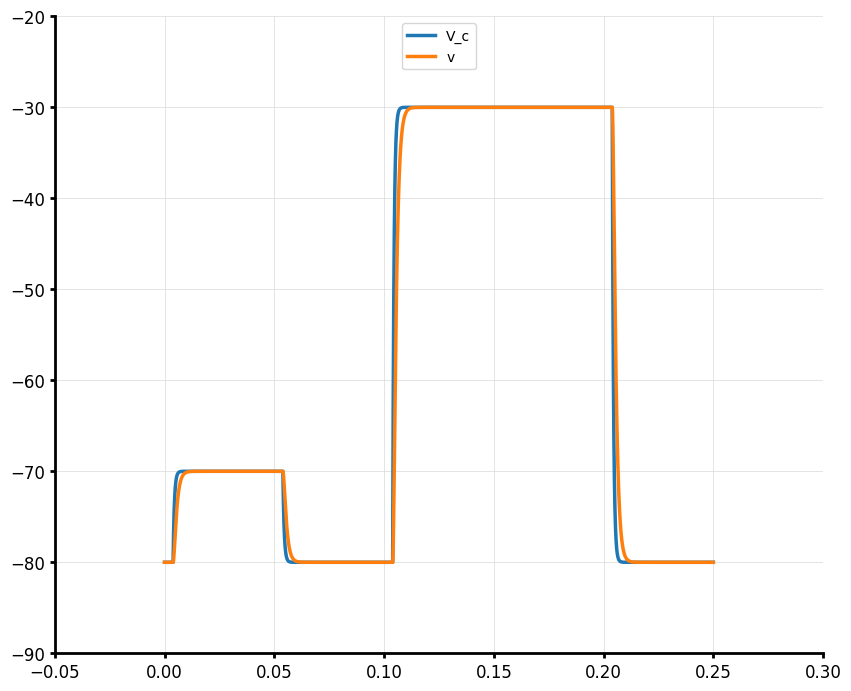

In [14]:
R_f = 50e6
C_f = 11.6e-12
R  =  100e6
C = 12e-12
    

v_list = np.array([-80,-80,-70,-80,-30,-80])
v = []
v1 = []
v_c = []
count = 0
start = 0
v_c.append(-80)
v.append(-80)
#v1.append(-80)
for k in range(1,len(t)):
    v_0 = v_list[count]
    V_m = v_list[count+1]
    v_c.append((v_0 - V_m)*np.exp(-time[k]/(R_f*C_f)) + V_m)
    #v.append((v_0 - V_m)*np.exp(-time[k]/(R_f*C_f))*np.exp(-time[k]/(R*C)) + V_m)
    v.append(v[k-1]+(v_c[k-1]-v[k-1])*5e-5/(R*C))
    #v.append(v[k-1]+(v_c[k]-v_c[k-1])*R*C/5e-5)
    #print((v_c[k]-v_c[k-1])*R*C/5e-5)
    if k==77:
        count=1
    if k==1077:
        count=2
    if k==2077:
        count=3
    if k==4077:
        count=4
t_for_graph = np.arange(0, len(t)*5e-5,5e-5)        
#v = np.array(v) 
plt.plot(t_for_graph,v_c, label = 'V_c')
#plt.plot(np.diff(v_c)*R*C/np.diff(t_for_graph))
plt.plot(t_for_graph,v, label = 'v')
#plt.plot(t_for_graph,v1, label = 'v1')
plt.legend()
print(R*C, R_f*C_f)


In [15]:

def full_log_fit(t,C_f, C,a0_m,b0_m,delta_m,s_m,a0_h,b0_h,delta_h,s_h, R,R_f, g_max):#, V_m):
    
    
    params = [C_f,C ,a0_m,b0_m,delta_m,s_m,a0_h,b0_h,delta_h,s_h, R,R_f, g_max]#, V_m]
    
    C_f = np.exp(C_f,dtype=np.float128)
    C = np.exp(C,dtype=np.float128)
    
    #V_m = np.exp(V_m)
    
    a0_m = np.exp(a0_m,dtype=np.float128)
    b0_m = np.exp(b0_m,dtype=np.float128)
    
    delta_m = np.exp(delta_m,dtype=np.float128)
    s_m = np.exp(s_m,dtype=np.float128)
    
    a0_h = np.exp(a0_h,dtype=np.float128)
    b0_h = np.exp(b0_h,dtype=np.float128)
    
    delta_h = np.exp(delta_h,dtype=np.float128)
    s_h = np.exp(s_h,dtype=np.float128) 
    
    R = np.exp(R,dtype=np.float128)
    R_f = np.exp(R_f,dtype=np.float128)
    
    g_max = np.exp(g_max,dtype=np.float128)
    
    #t = np.arange(0, len(data)*5e-5,5e-5)
  
    #v_const = -80 #mV
    #V_m = 30
    #v = (v_const + V_m)*np.exp(-(t)/(R*C)) - V_m
    v_list = np.array([-80,-80,-70,-80,-10,-80])
    v = [-80]
    v_c_f = [-80]
    count = 0
    start = 0
    #v_c.append(-80)
    #v.append(-80)
    for k in range(1,len(t)):
        v_0 = v_list[count]
        V_m = v_list[count+1]
        #v.append((v_0 - V_m)*np.exp(-t[k]/(R*C)) + V_m)
        v_c_f.append((v_0 - V_m)*np.exp(-t[k]/(R_f*C_f)) + V_m)
        v.append(v[k-1]+(v_c_f[k-1]-v[k-1])*5e-5/(R*C))
        if k==77:
            count=1
        if k==1077:
            count=2
        if k==2077:
            count=3
        if k==4077:
            count=4
        
    v = np.array(v) 
    
    # s<0 , 0 =< delta =<1 , a0, b0 >0
    
    alfa_m = a0_m * np.exp(-delta_m * v / (-s_m))
    betta_m = b0_m * np.exp((1-delta_m) * v / (-s_m))
    
    
    alfa_h = a0_h * np.exp(-delta_h * v / s_h)
    betta_h = b0_h * np.exp((1-delta_h) * v / s_h)

    
    
    tau_m = 1/(betta_m + alfa_m)
    tau_h = 1/(betta_h + alfa_h)
    v_const = -80
    
    
    m_inf = 1/(1+betta_m/alfa_m)
    h_inf = 1/(1+betta_h/alfa_h)
    
    m0 = 1/(1+(b0_m/a0_m)*np.exp(v_const/(-s_m)))
    h0 = 1/(1+(b0_h/a0_h)*np.exp(v_const/s_h))#1/(1+betta_h_0/alfa_h_0)

    m = m_inf + (m0-m_inf)*np.exp(-t/tau_m)
    h = h_inf + (h0-h_inf)*np.exp(-t/tau_h)
    
    
    #plt.figure()
    #plt.scatter(v_const,m0**3, label = 'm_0')
    #plt.scatter(v_const,h0, label = 'h_0')

  
    
    if False:
        


        
        plt.plot(v, tau_m, label = 'tau_m')
        plt.plot(v, tau_h, label = 'tau_h')
        plt.legend()


        plt.plot(v,m_inf, label = 'm_inf')
        plt.plot(v,h_inf, label = 'h_inf')
        plt.legend()

    v_rev = 18
    
    i_с = []
    i_c_f= []
    for l in range(1,len(v)):
        i_с.append(1e9*C*(v[l]-v[l-1])/5e-5)#(t_for_graph[l]-t_for_graph[l-1]))
        i_c_f.append(1e9*C_f*(v_c_f[l]-v_c_f[l-1])/5e-5)#(t_for_graph[l]-t_for_graph[l-1]))
    #for l in range(1,len(v)):
    #    i.append(1e9*C*(v[l]-v[l-1])/(t[l]-t[l-1]))
    #i.insert(0,i[0])
    i_с.append(i_с[-1])
    i_c_f.append(i_c_f[-1])

    plt.scatter(['C_f','C ','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','R_f','g_max'],params,s = 100, color = 'orange')
    #plt.xlim(0,10)
    return g_max*h*(m**3)*(v-v_rev)+i_с+i_c_f
    #return sum((g_max*h*(m**3)*(v-v_rev)+i - data)**2)



In [16]:

def full_log(t,C_f, C,a0_m,b0_m,delta_m,s_m,a0_h,b0_h,delta_h,s_h, R,R_f, g_max):#, V_m):
    
    
    params = [C_f,C ,a0_m,b0_m,delta_m,s_m,a0_h,b0_h,delta_h,s_h, R,R_f, g_max]#, V_m]
    
    C_f = np.exp(C_f,dtype=np.float128)
    C = np.exp(C,dtype=np.float128)
    
    #V_m = np.exp(V_m)
    a0_m = np.exp(a0_m,dtype=np.float128)
    b0_m = np.exp(b0_m,dtype=np.float128)
    
    delta_m = np.exp(delta_m,dtype=np.float128)
    s_m = np.exp(s_m,dtype=np.float128)
    
    a0_h = np.exp(a0_h,dtype=np.float128)
    b0_h = np.exp(b0_h,dtype=np.float128)
    
    delta_h = np.exp(delta_h,dtype=np.float128)
    s_h = np.exp(s_h,dtype=np.float128) 
    
    R = np.exp(R,dtype=np.float128)
    R_f = np.exp(R_f,dtype=np.float128)
    
    g_max = np.exp(g_max,dtype=np.float128)
    
    t_for_graph = np.arange(0, len(t)*5e-5,5e-5)
  
    #v_const = -80 #mV
    #V_m = 30
    #v = (v_const + V_m)*np.exp(-(t)/(R*C)) - V_m
    v_list = np.array([-80,-80,-70,-80,-10,-80])
    v = [-80]
    v_c_f = [-80]
    count = 0
    start = 0
    for k in range(1,len(t)):
        v_0 = v_list[count]
        V_m = v_list[count+1]
        v_c_f.append((v_0 - V_m)*np.exp(-t[k]/(R_f*C_f)) + V_m)
        v.append(v[k-1]+(v_c_f[k-1]-v[k-1])*5e-5/(R*C))
        #v.append((v_0 - V_m)*np.exp(-t[k]/(R*C)) + V_m)
        if k==77:
            count=1
        if k==1077:
            count=2
        if k==2077:
            count=3
        if k==4077:
            count=4
        
    v = np.array(v) 
    
    # s<0 , 0 =< delta =<1 , a0, b0 >0
    
    alfa_m = a0_m * np.exp(-delta_m * v / (-s_m))
    betta_m = b0_m * np.exp((1-delta_m) * v / (-s_m))
    
    
    alfa_h = a0_h * np.exp(-delta_h * v / s_h)
    betta_h = b0_h * np.exp((1-delta_h) * v / s_h)

    
    
    tau_m = 1/(betta_m + alfa_m)
    tau_h = 1/(betta_h + alfa_h)
    
    
    v_const = -80
    m_inf = 1/(1+betta_m/alfa_m)
    h_inf = 1/(1+betta_h/alfa_h)
    
    m0 = 1/(1+(b0_m/a0_m)*np.exp(v_const/(-s_m)))
    h0 = 1/(1+(b0_h/a0_h)*np.exp(v_const/s_h))#1/(1+betta_h_0/alfa_h_0)

    m = m_inf + (m0-m_inf)*np.exp(-t/tau_m)
    h = h_inf + (h0-h_inf)*np.exp(-t/tau_h)
    
    
    #plt.figure()
    #plt.scatter(v_const,m0**3, label = 'm_0')
    #plt.scatter(v_const,h0, label = 'h_0')


        
    plt.figure()    
    plt.plot(t_for_graph,v, label = 'v')
    plt.plot(t_for_graph, v_c_f, label = 'v_c_f')
    plt.legend()

    plt.figure()
    plt.plot(v, tau_m, label = 'tau_m')
    plt.plot(v, tau_h, label = 'tau_h')
    plt.legend()

    plt.figure()
    plt.plot(v,m_inf, label = 'm_inf')
    plt.plot(v,h_inf, label = 'h_inf')
    plt.legend()

    v_rev = 18
    
    i_с=[]
    i_c_f = []
    #print(len(v), len(v_c_f))
    for l in range(1,len(v)):
        i_с.append(1e9*C*(v[l]-v[l-1])/5e-5)#(t_for_graph[l]-t_for_graph[l-1]))
        i_c_f.append(1e9*C_f*(v_c_f[l]-v_c_f[l-1])/5e-5)#(t_for_graph[l]-t_for_graph[l-1]))
        #print
    #for l in range(1,len(v)):
    #    i.append(1e9*C*(v[l]-v[l-1])/(t[l]-t[l-1]))
    #i.insert(0,i[0])
    i_с.append(i_с[-1])
    i_c_f.append(i_c_f[-1])
    #plt.scatter(['C_f','C ','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','R_f','g_max'],params,s = 100, color = 'orange')
    #plt.xlim(0,10)
    #plt.figure()
    plt.figure()
    plt.plot(t_for_graph, i_с, label = 'i_c')
    plt.plot(t_for_graph, i_c_f, label = 'i_c_f')
    plt.plot(t_for_graph, g_max*h*(m**3)*(v-v_rev), label = 'INa')
    #plt.plot(t_for_graph, const, label = 'const')
    plt.legend()
    
    return g_max*h*(m**3)*(v-v_rev)+i_с+ i_c_f
    #return sum((g_max*h*(m**3)*(v-v_rev)+i - data)**2)



In [17]:
#ломать-не строить



def broken(t,C_p, C_m,a0_m,b0_m,delta_m,s_m,a0_h,b0_h,delta_h,s_h, R_m,R_p, g_max,g_leak):#, V_m):
    
    
    params = [C_p,C_m ,a0_m,b0_m,delta_m,s_m,a0_h,b0_h,delta_h,s_h, R_m,R_p, g_max, g_leak]#, V_m]
    
    C_p = np.exp(C_p,dtype=np.float128)
    C_m = np.exp(C_m,dtype=np.float128)
    
    #V_m = np.exp(V_m)
    
    a0_m = np.exp(a0_m,dtype=np.float128)
    b0_m = np.exp(b0_m,dtype=np.float128)
    
    delta_m = np.exp(delta_m,dtype=np.float128)
    s_m = np.exp(s_m,dtype=np.float128)
    
    a0_h = np.exp(a0_h,dtype=np.float128)
    b0_h = np.exp(b0_h,dtype=np.float128)
    
    delta_h = np.exp(delta_h,dtype=np.float128)
    s_h = np.exp(s_h,dtype=np.float128) 
    
    R_m = np.exp(R_m,dtype=np.float128)
    R_p = np.exp(R_p,dtype=np.float128)
    
    g_max = np.exp(g_max,dtype=np.float128)
    g_leak = np.exp(g_leak,dtype=np.float128)
    
    #t = np.arange(0, len(data)*5e-5,5e-5)
  
    #v_const = -80 #mV
    #V_m = 30
    #v = (v_const + V_m)*np.exp(-(t)/(R*C)) - V_m
    v_list = np.array([-80,-80,-70,-80,-10,-80])
    v = [-80]
    v_p = [-80]
    count = 0
    start = 0
    #v_c.append(-80)
    #v.append(-80)
    for k in range(1,len(t)):
        v_0 = v_list[count]
        V_m = v_list[count+1]
        #v.append((v_0 - V_m)*np.exp(-t[k]/(R*C)) + V_m)
        v_p.append(V_m+(v_0 - V_m)*np.exp(-t[k]/(R_p*C_p)))# + V_m)
        #v_p.append(v_p[k-1]+(V_m-v_p[k-1])*5e-5/(R_p*C_p))#8e-4)#0.8ms 
        v.append(v[k-1]+(v_p[k-1]-v[k-1])*5e-5/(R_m*C_m))
        if k==77:
            count=1
        if k==1077:
            count=2
        if k==2077:
            count=3
        if k==4077:
            count=4
    v_p = np.array(v_p)    
    v = np.array(v) 
    
    # s<0 , 0 =< delta =<1 , a0, b0 >0
    
    alfa_m = a0_m * np.exp(-delta_m * v / (-s_m))
    betta_m = b0_m * np.exp((1-delta_m) * v / (-s_m))
    
    
    alfa_h = a0_h * np.exp(-delta_h * v / s_h)
    betta_h = b0_h * np.exp((1-delta_h) * v / s_h)

    
    
    tau_m = 1/(betta_m + alfa_m)
    tau_h = 1/(betta_h + alfa_h)
    v_const = -80
    
    
    m_inf = 1/(1+betta_m/alfa_m)
    h_inf = 1/(1+betta_h/alfa_h)
    
    m0 = 1/(1+(b0_m/a0_m)*np.exp(v_const/(-s_m)))
    h0 = 1/(1+(b0_h/a0_h)*np.exp(v_const/s_h))#1/(1+betta_h_0/alfa_h_0)

    m = m_inf + (m0-m_inf)*np.exp(-t/tau_m)
    h = h_inf + (h0-h_inf)*np.exp(-t/tau_h)
    
    
    #plt.figure()
    #plt.scatter(v_const,m0**3, label = 'm_0')
    #plt.scatter(v_const,h0, label = 'h_0')

  
    
    if False:
        
        plt.figure()    
        
        plt.plot(t_for_graph, v_p, label = 'v_p')
        plt.plot(t_for_graph,v, label = 'v')
        plt.legend()

    if False:
        plt.figure() 
        plt.plot(v, tau_m, label = 'tau_m')
        plt.plot(v, tau_h, label = 'tau_h')
        plt.legend()

        plt.figure() 
        plt.plot(v,m_inf, label = 'm_inf')
        plt.plot(v,h_inf, label = 'h_inf')
        plt.legend()

    v_rev = 18
    
    i_c= []
    i_p= []
    for l in range(1,len(v)):
        i_c.append(1e9*C_m*(v[l]-v[l-1])/5e-5)#(t_for_graph[l]-t_for_graph[l-1]))
        i_p.append(1e9*C_p*(v_p[l]-v_p[l-1])/5e-5)#(t_for_graph[l]-t_for_graph[l-1]))
    #for l in range(1,len(v)):
    #    i.append(1e9*C*(v[l]-v[l-1])/(t[l]-t[l-1]))
    #i.insert(0,i[0])
    #i_c = np.diff(v)*1e-9*C_m/5e-5
    i_c.append(i_c[-1])
    i_p.append(i_p[-1])
    i_leak = g_leak*(v)
    #plt.figure()
    plt.scatter(['C_p','C_m','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R_m','R_p','g_max', 'g_leak'],params,s = 100, color = 'orange')
    #plt.xlim(0,10)
    #return g_max*h*(m**3)*(v-v_rev) + i_p + i_c + i_leak
    #return sum((g_max*h*(m**3)*(v-v_rev)+i - data)**2)
    tau_z = 1e-12*5e8
    I_in =  g_max*h*(m**3)*(v-v_rev) + i_p + i_c# + i_leak
    I_out = [I_in[0]]
    for k in range(1,len(t)):
        I_out.append(I_out[k-1]+(I_in[k-1]-I_out[k-1])*5e-5/tau_z)
    return I_out



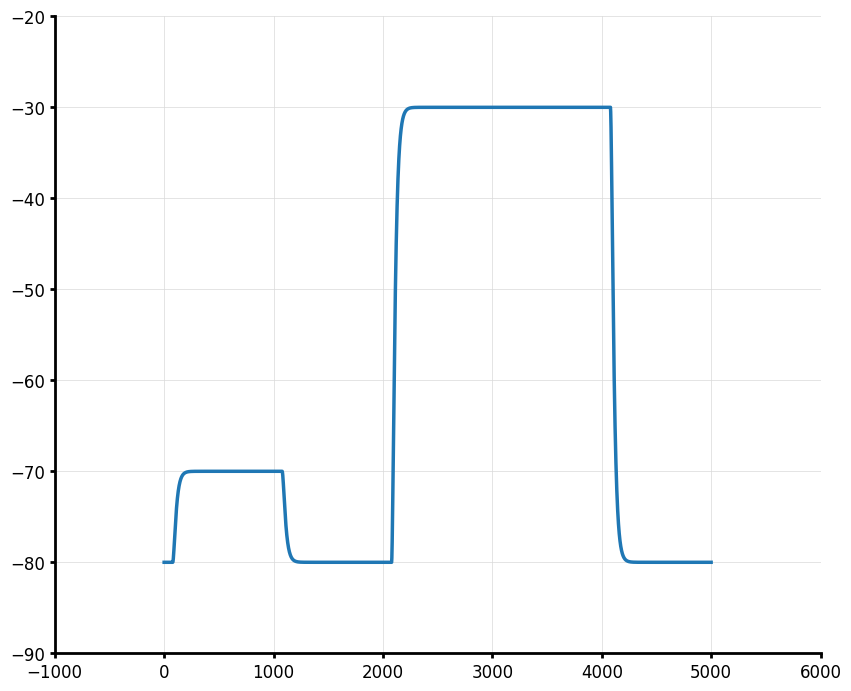

In [18]:
plt.plot(v)

# Real data

No handles with labels found to put in legend.


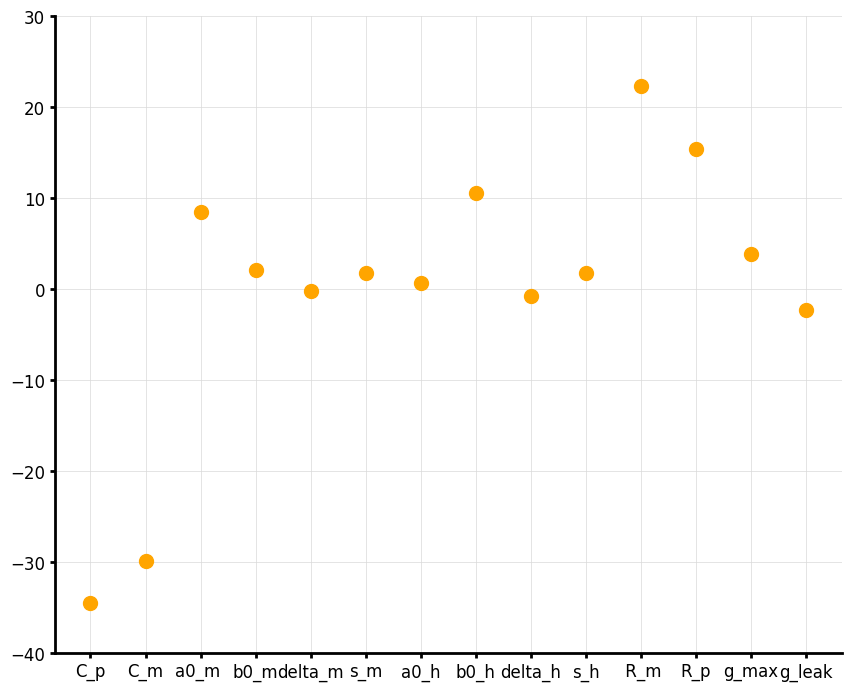

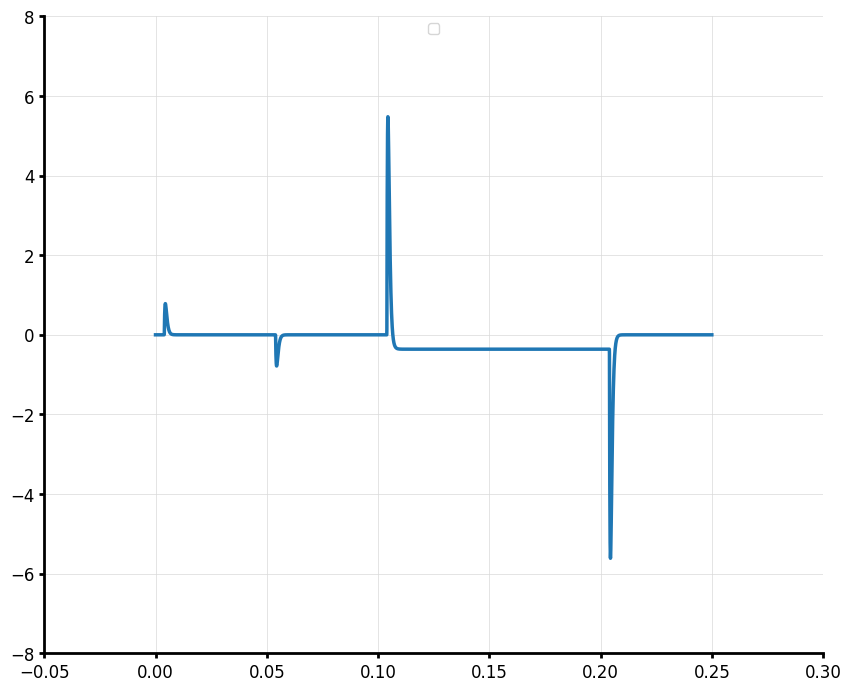

In [20]:
#Counting the start point
#p0 = np.log(np.array([6e-13,11.6e-12,5e3,8,0.85,6,2,4e4,0.5,6,500e6,5e6,5e1]))
#                C_f     C     a0_m  b0_m  delta_m  s_m   a0_h  b0_h   delta_h  s_h      R    R_f   g_max  g_leak
#p0 = np.array([6e-15, 12e-12, 5e3,  8,     0.85,   6,     2,   4e4,    0.5,     6,    5e8,   5e6,   5e1,   1e-1])

p0 = np.array([1e-15, 1e-13, 5e3,  8,     0.85,   6,     2,   4e4,    0.5,     6,    5e9,   5e6,   5e1,1e-1])
log_p0 = np.log(p0)
#ff1 = full_log(np.array(time), *log_p0)
ff = broken(np.array(time), *log_p0)
#plt.xlim(0.103,0.1051)
plt.figure()
#plt.plot(data2020_1219_0035[0],ff[0], label = 'Ina')
#plt.plot(data2020_1219_0035[0],ff[1], label = 'I_p')
#plt.plot(data2020_1219_0035[0],ff[2], label = 'I_c')
#plt.plot(data2020_1219_0035[0],ff[3], label = 'I_leak')
plt.plot(t,ff)
plt.legend()
#plt.plot(t,sum(ff))
#plt.plot(data2020_1219_0035[0],ff1)
#plt.plot(data2020_1, data2020_1219_0035[10])


<ipython-input-15-e8498d83ff12>:60: RuntimeWarning: overflow encountered in exp
  betta_m = b0_m * np.exp((1-delta_m) * v / (-s_m))
<ipython-input-15-e8498d83ff12>:76: RuntimeWarning: overflow encountered in exp
  m0 = 1/(1+(b0_m/a0_m)*np.exp(v_const/(-s_m)))
<ipython-input-15-e8498d83ff12>:79: RuntimeWarning: divide by zero encountered in true_divide
  m = m_inf + (m0-m_inf)*np.exp(-t/tau_m)
<ipython-input-15-e8498d83ff12>:79: RuntimeWarning: invalid value encountered in true_divide
  m = m_inf + (m0-m_inf)*np.exp(-t/tau_m)


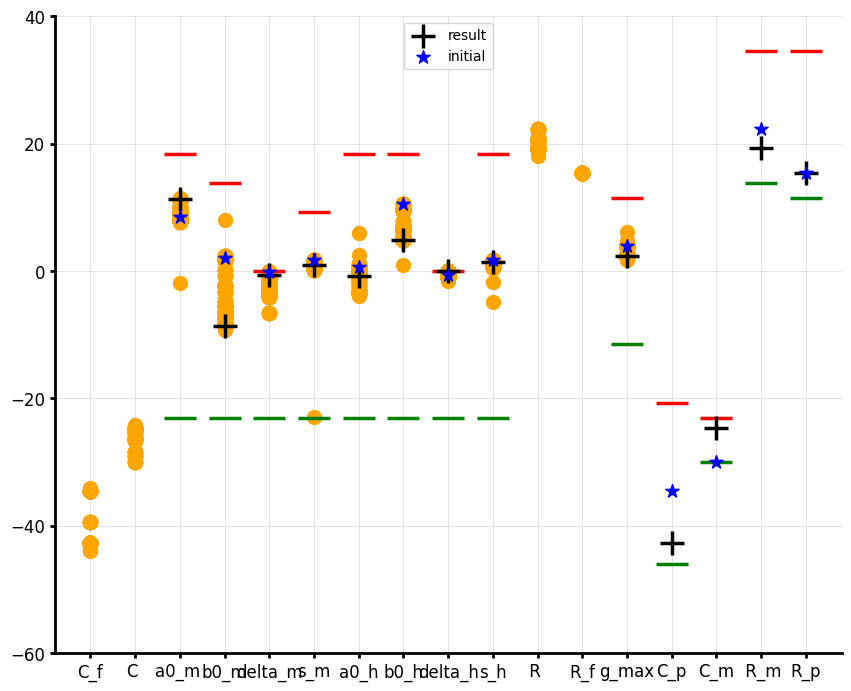

In [21]:
#                C_f     C     a0_m  b0_m  delta_m  s_m   a0_h  b0_h   delta_h  s_h      R    R_f   g_max  g_leak
#p0 = np.array([6e-15, 12e-12, 5e3,  8,     0.85,   6,     2,   4e4,    0.5,     6,    5e8,   5e6,   5e1,   1e-1])
#log_p0 = np.log(p0)
p0 = np.array([1e-15, 1e-13, 5e3,  8,     0.85,   6,     2,   4e4,    0.5,     6,    5e9,   5e6,   5e1])#,1e-1])
log_p0 = np.log(p0)

#           C_f     C    a0_m   b0_m    delta_m   s_m    a0_h   b0_h   delta_h  s_h      R    R_f   g_max g_leak
bounds = ([1e-20, 1e-13, 1e-10, 1e-10,  1e-10,   1e-10,  1e-10, 1e-10, 1e-10,   1e-10,  1e6,  1e5,  1e-5],#, 1e-5],
          [1e-9,  1e-10, 1e8,   1e6,    1,       1e4,    1e8,   1e8,   1,       1e8,    1e15, 1e15, 1e5])#,  1e5])
log_bounds = (np.log(bounds[0]),np.log(bounds[1]))


data_count =  data[14]# - np.mean(data[14][:78])#current_2020_1219_0035[10]


result = scop.curve_fit(full_log_fit,time,data_count,p0 = log_p0,  bounds = log_bounds, maxfev = 1e10)
#result = scop.curve_fit(broken,time,data_count,p0 = log_p0,  bounds = log_bounds, maxfev = 1e10)

plt.scatter(['C_p','C_m','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R_m','R_p','g_max'],log_bounds[0], marker='_', color = 'g', s = 500)
plt.scatter(['C_p','C_m','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R_m','R_p','g_max'],log_bounds[1], marker='_', color = 'r', s = 500)
plt.scatter(['C_p','C_m','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R_m','R_p','g_max'],result[0], marker='+', color = 'k', s = 300, label  = 'result')
plt.scatter(['C_p','C_m','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R_m','R_p','g_max'],log_p0, marker='*', color = 'b', s = 100, label  = 'initial')
           #['C_p','C_m','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R_m','R_p','g_max', 'g_leak']
plt.legend()

np.save('real_res_ff', result[0])

<ipython-input-17-d6a1ace956a9>:69: RuntimeWarning: overflow encountered in exp
  alfa_h = a0_h * np.exp(-delta_h * v / s_h)
<ipython-input-17-d6a1ace956a9>:86: RuntimeWarning: divide by zero encountered in true_divide
  h = h_inf + (h0-h_inf)*np.exp(-t/tau_h)
<ipython-input-17-d6a1ace956a9>:86: RuntimeWarning: invalid value encountered in true_divide
  h = h_inf + (h0-h_inf)*np.exp(-t/tau_h)


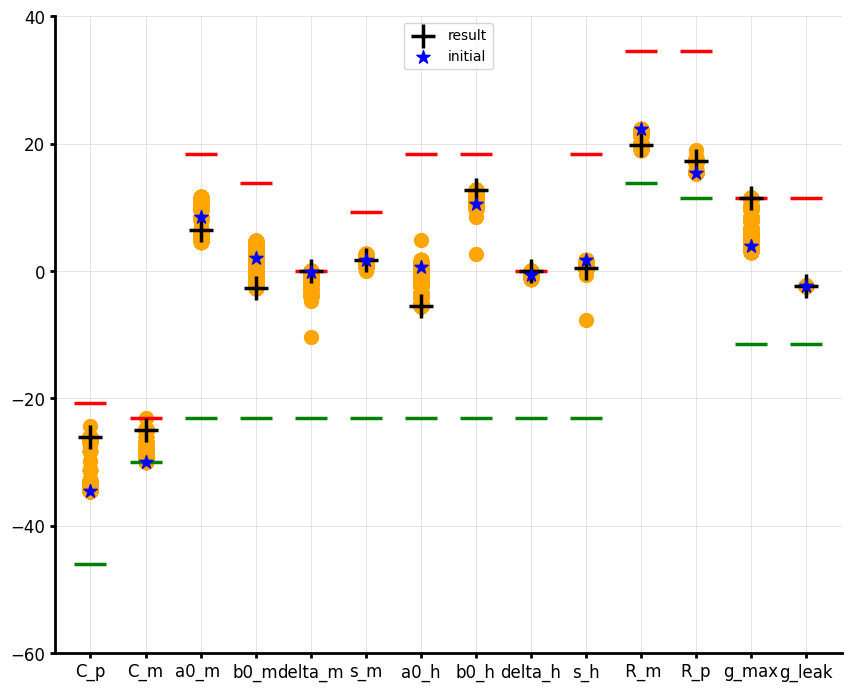

In [22]:
#                C_f     C     a0_m  b0_m  delta_m  s_m   a0_h  b0_h   delta_h  s_h      R    R_f   g_max  g_leak
#p0 = np.array([6e-15, 12e-12, 5e3,  8,     0.85,   6,     2,   4e4,    0.5,     6,    5e8,   5e6,   5e1,   1e-1])
#log_p0 = np.log(p0)
p0 = np.array([1e-15, 1e-13, 5e3,  8,     0.85,   6,     2,   4e4,    0.5,     6,    5e9,   5e6,   5e1,1e-1])
log_p0 = np.log(p0)

#           C_f     C    a0_m   b0_m    delta_m   s_m    a0_h   b0_h   delta_h  s_h      R    R_f   g_max g_leak
bounds = ([1e-20, 1e-13, 1e-10, 1e-10,  1e-10,   1e-10,  1e-10, 1e-10, 1e-10,   1e-10,  1e6,  1e5,  1e-5, 1e-5],
          [1e-9,  1e-10, 1e8,   1e6,    1,       1e4,    1e8,   1e8,   1,       1e8,    1e15, 1e15, 1e5,  1e5])
log_bounds = (np.log(bounds[0]),np.log(bounds[1]))


data_count =  data[14]# - np.mean(data[14][:78])#current_2020_1219_0035[10]


#result = scop.curve_fit(full_log_fit,time,data_count,p0 = log_p0,  bounds = log_bounds, maxfev = 1e10)
result = scop.curve_fit(broken,time,data_count,p0 = log_p0,  bounds = log_bounds, maxfev = 1e10)

plt.scatter(['C_p','C_m','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R_m','R_p','g_max','g_leak'],log_bounds[0], marker='_', color = 'g', s = 500)
plt.scatter(['C_p','C_m','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R_m','R_p','g_max','g_leak'],log_bounds[1], marker='_', color = 'r', s = 500)
plt.scatter(['C_p','C_m','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R_m','R_p','g_max','g_leak'],result[0], marker='+', color = 'k', s = 300, label  = 'result')
plt.scatter(['C_p','C_m','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R_m','R_p','g_max','g_leak'],log_p0, marker='*', color = 'b', s = 100, label  = 'initial')
           #['C_p','C_m','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R_m','R_p','g_max', 'g_leak']
plt.legend()

#np.save('real_res', result[0])

np.save('real_res_no_seal', result[0])
                            

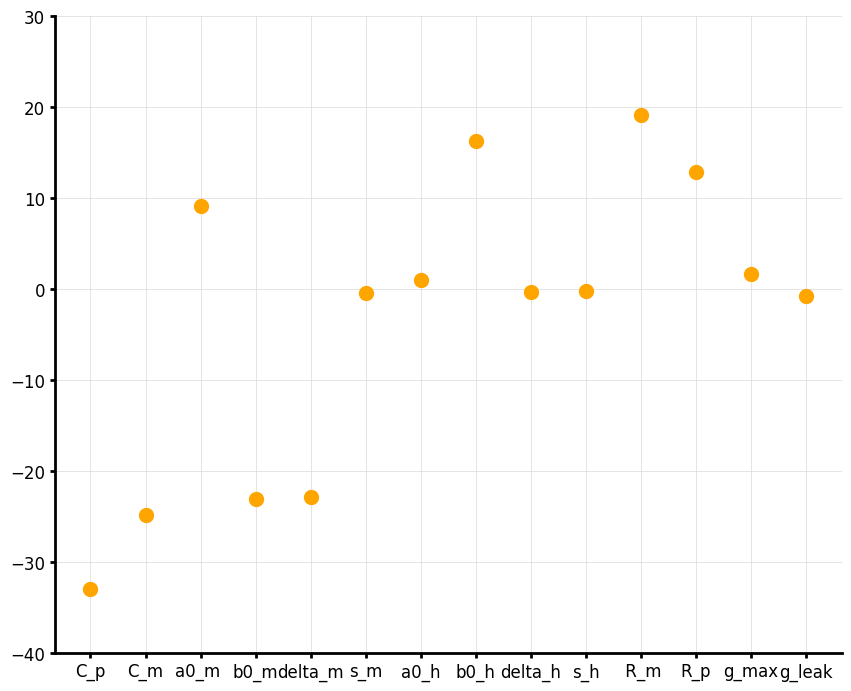

In [23]:
#full_trace =  full_log(np.array(time), *np.load('real_res.npy'))
full_trace = broken(np.array(time), *np.load('real_res.npy'))
#plt.legend()

In [24]:
t

0       0.00000
1       0.00005
2       0.00010
3       0.00015
4       0.00020
         ...   
4995    0.24975
4996    0.24980
4997    0.24985
4998    0.24990
4999    0.24995
Name: 0, Length: 5000, dtype: float64

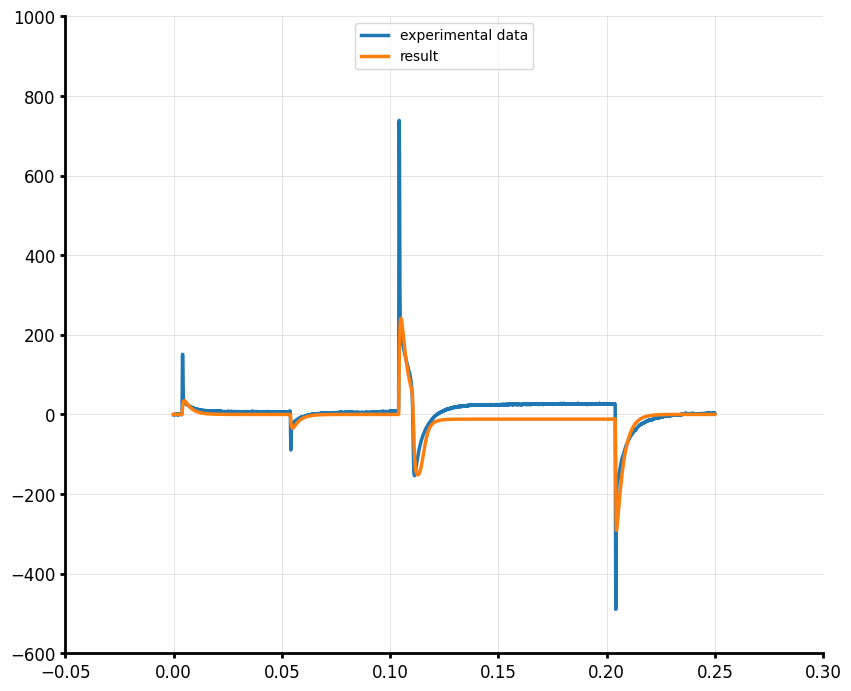

In [25]:
plt.plot(t, data[14]-np.mean(data[14][:78]), label = 'experimental data')
#plt.plot(t, data[14], label = 'experimental data')
#plt.plot(t,ff, label = 'start point')
plt.plot(t,full_trace, label = 'result')
plt.legend()


# Artificial data

In [ ]:
#Counting the start point for ff
p0_ff = np.array([1e-16,  4e-11, 1e2,  30,    0.4,   12,     8,   4e2,    0.9,     10,   5e6,   5e8,   7])
log_p0_ff = np.log(p0_ff)
ff_p0_full_trace =  full_log(np.array(time), *log_p0_ff)
plt.legend()

In [ ]:
ff1 = sum(full_log(time,*log_p0))

In [ ]:
#              C_f     C     a0_m  b0_m  delta_m  s_m   a0_h  b0_h   delta_h  s_h      R    R_f   g_max
#p0 = np.array([6e-15, 12e-12, 5e3,  8,     0.85,   6,     2,   4e4,    0.5,     6,    5e8,   5e6,   5e1])
p0_ff = np.array([1e-16,  40e-12, 1e2,  30,    0.4,   12,     8,   4e2,    0.9,     10,   5e6,   5e8,   7])
log_p0_ff = np.log(p0_ff)

#           C_f     C    a0_m   b0_m    delta_m   s_m    a0_h   b0_h   delta_h  s_h      R    R_f   g_max
bounds = ([1e-16, 1e-13, 1e-10, 1e-10,  1e-10,   1e-10,  1e-10, 1e-10, 1e-10,   1e-10,  1e6,  1e5,  1e-5],
          [1e-9,  1e-10, 1e10,  1e10,    1,       1e4,    1e8,   1e8,   1,       1e8,    1e10, 1e10, 1e5])

#data =  data2020_1219_0035[14] - np.mean(data2020_1219_0035[14][:78])#current_2020_1219_0035[10]
log_bounds = (np.log(bounds[0]),np.log(bounds[1]))

result = scop.curve_fit(full_log_fit,time,ff1,log_p0_ff,  bounds = log_bounds, maxfev = 1e10)

plt.scatter(['C_f','C','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','R_f','g_max'],log_bounds[0], marker='_', color = 'g', s = 500)
plt.scatter(['C_f','C','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','R_f','g_max'],log_bounds[1], marker='_', color = 'r', s = 500)
plt.scatter(['C_f','C','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','R_f','g_max'],result[0], marker='+', color = 'k', s = 300, label  = 'result')
plt.scatter(['C_f','C','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','R_f','g_max'],log_p0, marker='*', color = 'b', s = 100, label  = 'initial')

plt.legend()

np.save('art_res', result[0])

In [ ]:
art_full_trace =  full_log(np.array(time), *np.load('art_res.npy'))
plt.legend()

In [ ]:
plt.plot(t,ff1, label = 'artificial data')
#plt.plot(t, ff_p0_full_trace , label = 'start point')
plt.plot(t,art_full_trace, label = 'result')
plt.legend()
#plt.xlim(0.1, 0.15)

In [ ]:
get_coeff(np.exp(np.load('art_res.npy')))
art = np.exp(np.load('art_res.npy'))
art[2]/art[3]

In [ ]:
get_coeff(p0)
p0[2]/p0[3]

In [ ]:
get_coeff(p0_ff)

In [ ]:
plt.plot(data2020_1219_0035[0], data, label = 'data')
plt.plot(data2020_1219_0035[0], full_trace, label = 'result')
#plt.plot(data2020_1219_0035[0],ff)

In [ ]:
plt.plot(data2020_1219_0035[0],data2020_1219_0035[9]-np.mean(data2020_1219_0035[9][:78]),label = 'step = -40 mV')
plt.plot(data2020_1219_0035[0],data2020_1219_0035[7]-np.mean(data2020_1219_0035[7][:78]),label = 'step = -50 mV')
plt.plot(data2020_1219_0035[0],data2020_1219_0035[5]-np.mean(data2020_1219_0035[5][:78]),label = 'step = -60 mV')
plt.plot(data2020_1219_0035[0],data2020_1219_0035[3]-np.mean(data2020_1219_0035[3][:78]),label = 'step = -70 mV')
#plt.axvline(78)
plt.xlim(0,0.25)
plt.legend()
max_list = (max(data2020_1219_0035[9]),max(data2020_1219_0035[7]),max(data2020_1219_0035[5]), max(data2020_1219_0035[3]))
for k in range(len(max_list)):
    print('Step = ',-40-k*10,'mV , I_max = ',max_list[k],'pA')

In [ ]:
np.array(max_list)/min(max_list)

In [ ]:
max(data2020_1219_0035[9])

In [ ]:
plt.plot(data2020_1219_0035[0], data2020_1219_0035[10])

In [ ]:
get_coeff(np.exp(result[0]))

In [ ]:
#plt.figure()

#plt.xlim(0.1,0.15)
#plt.legend()
#plt.ylim(-400,500)

In [ ]:
p0 = np.log([5e3,8,0.85,6,2,4e4,0.5,6,500e6,11.6e-12,6e-15,5e3])
start = log_sodium_current(t,*p0)
plt.figure()
#plt.plot(t, rrrrr, label = "200")
#plt.plot(t, start[0], label = 'INa')
#plt.plot(t, start[1], label = 'IC')
plt.plot(t, start)    

In [ ]:
#to make complex V
if False:
    t = np.arange(0,10,5e-5)
    v_list = np.arange(-80,16,5)
    count = 0
    while count<=39:
        v_list = np.insert(v_list,count,-80)
        count+=2
    v = []
    count = 0
    start = 0
    R = 500e6
    C=11e-11
    for k in range(len(t)):
            v_0 = v_list[count]
            V_m = v_list[count+1]
            #print(v_0, V_m)
            v.append((v_0 - V_m)*np.exp(-(t[k]-start)/(R*C)) + V_m)
            if k%10000==0:
                count+=1
                start = t[k]
                print(start)



In [ ]:
#(t,a0_m=5e3,b0_m=8,delta_m=0.85,s_m=-5,a0_h=2,b0_h=4e4,delta_h=0.5,s_h=4, R = 500e6,C = 11.6e-12, g_max=1e3)
p0 = np.array([5e3,8,0.85,6,2,4e4,0.5,6,500e6,11.6e-12,5e3])

#p0 = [5e3,8,0.85,-6,2,4e4,0.5,6,500e6,11.6e-12,6e3]
bounds = ([1e-20,1e-20,1e-20,1e-20,1e-20,1e-20,1e-20,1e-20,1e6,1e-13,1],[1e6,106,1,1e4,1e8,1e8,1,1e8,1e10,1e-10,1e6])


result = scop.curve_fit(sodium_current_for_fit, t, data[185:],p0 = p0,  bounds = bounds, maxfev = 1e10)

plt.scatter(['a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','C  ','g_max'],(bounds[0]), marker='_', color = 'g', s = 500)

plt.scatter(['a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','C  ','g_max'],(bounds[1]), marker='_', color = 'r', s = 500)
plt.scatter(['a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','C  ','g_max'],(result[0]), marker='+', color = 'k', s = 300, label  = 'result')
plt.scatter(['a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','C  ','g_max'],p0, marker='*', color = 'b', s = 100, label  = 'initial')



In [ ]:
p0 = np.log([5e3,8,0.85,6,2,4e4,0.5,6,500e6,11.6e-12,6e-15,5e3])
start = log_sodium_current_for_fit(t,*p0)
plt.figure()
plt.plot(t, start, label = 'start')

In [ ]:
#(t,a0_m=5e3,b0_m=8,delta_m=0.85,s_m=-5,a0_h=2,b0_h=4e4,delta_h=0.5,s_h=4, R = 500e6,C = 11.6e-12, g_max=1e3)
p0 = np.array([5e3,8,0.85,6,2,4e4,0.5,6,500e6,11.6e-12,6e-15,5e3])
log_p0 = np.log(p0)
#p0 = [5e3,8,0.85,-6,2,4e4,0.5,6,500e6,11.6e-12,6e3]
bounds = ([1e-20,1e-20,1e-20,1e-20,1e-20,1e-20,1e-20,1e-20,1e6,1e-13,1e-20,1],[1e10,106,1,1e4,1e8,1e8,1,1e8,1e10,1e-10,1e-9,1e10])


#p0 = np.array([5e3,8,0.85,6,2,4e4,0.5,6,500e6,11.6e-12,5e3])
#log_p0 = np.log(p0)
data = current_2020_1219_0035[10]
#p0 = [5e3,8,0.85,-6,2,4e4,0.5,6,500e6,11.6e-12,6e3]
#bounds = ([1e-20,1e-20,1e-4,1e-20,1e-20,1e-20,1e-4,1e-20,1e6,1e-13,1],[1e10,1e6,1,1e4,1e8,1e8,1,1e8,1e10,1e-10,1e6])
log_bounds = (np.log(bounds[0]),np.log(bounds[1]))

result = scop.curve_fit(log_sodium_current_for_fit, t, data[185:],p0 = log_p0,  bounds = log_bounds, maxfev = 1e10)

plt.scatter(['a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','C  ','C_f','g_max'],log_bounds[0], marker='_', color = 'g', s = 500)

plt.scatter(['a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','C  ','C_f','g_max'],log_bounds[1], marker='_', color = 'r', s = 500)
plt.scatter(['a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','C  ','C_f','g_max'],result[0], marker='+', color = 'k', s = 300, label  = 'result')
plt.scatter(['a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','C  ','C_f','g_max'],log_p0, marker='*', color = 'b', s = 100, label  = 'initial')



In [ ]:
result[0]

In [ ]:
res = log_sodium_current(t, *result[0])

t = np.arange(0, (len(data)  - 185)*5e-5,5e-5 )
plt.figure()
plt.plot(t,data[185:],label = 'initial data')
#plt.plot(t, start, label = 'start')
plt.plot(t, res, label = 'result')
plt.legend()
#plt.xlim(0.,0.03)

In [ ]:
get_coeff(np.exp(result[0]))

In [ ]:
get_coeff(p0)

In [ ]:
if False:
# t = np.arange(0,0.1089,0.00005)
    #rrrrr = sodium_cuarrent(t,a0_m=0.005,b0_m=5,delta_m=0.85,s_m=7,a0_h=2000,b0_h=4,delta_h=0.5,s_h=-8, R = 50e6,C = 11.6e-12, g_max=50)
    rrrrr1 = sodium_current(t,a0_m=50,b0_m=8,delta_m=0.85,s_m=-10,a0_h=20,b0_h=4000,delta_h=0.5,s_h=16, R = 60e6,C = 11.6e-12, g_max=1000)
    plt.figure()
    #plt.plot(t, rrrrr, label = "200")
    plt.plot(t, rrrrr1[0], label = '20')
    plt.plot(t, rrrrr1[0], label = '20')
    #plt.plot(t,current_2020_1219_0035[14][185:])
    #plt.plot(t,sodium_current(t, *result[0]))
    plt.legend()



In [ ]:
plt.plot(current_2020_1219_0035[14])
len(current_2020_1219_0035[14])*5e-5